In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
NK = pd.read_csv('HIV_NK_sigm.txt',sep='\t',index_col=0)
Monocytes = pd.read_csv('HIV_Monocytes_sigm.txt',sep='\t',index_col=0)
CD4T = pd.read_csv('HIV_CD4Tcells_sigm.txt',sep='\t',index_col=0)
CD8T = pd.read_csv('HIV_CD8Tcells_sigm.txt',sep='\t',index_col=0)
Bcell = pd.read_csv('HIV_Bcells_sigm.txt',sep='\t',index_col=0)
Den = pd.read_csv('HIV_Dendritics_sigm.txt',sep='\t',index_col=0)
HIV = pd.read_csv('HIV_pbmc_tpm.csv',sep=',',index_col=0)
samplename = HIV.columns
genename = HIV.index

In [3]:
from sklearn.preprocessing import scale

In [33]:
def select_signature_genes(z_score):
    values = z_score.values
    signature_genes = []
    
    for i in range(z_score.shape[0]):
        arr = values[i,:]
        idx = arr.argsort()[-2:]
        diff = arr[idx][-1]-arr[idx[-2]]
        if diff >=1:
            signature_genes.append(i)
    print(len(signature_genes))
    return z_score.iloc[signature_genes,:]

In [34]:
alldata = pd.concat([Bcell, CD4T, CD8T, Den, Monocytes, NK],axis=1)
z_score = pd.DataFrame(scale(alldata,axis=1),index=alldata.index,columns=alldata.columns)
display(z_score)
selected = select_signature_genes(z_score)
labels = ['Bcell', 'CD4Tcell', 'CD8Tcell', 'Dendritics', 'Monocyte', 'NK']

,ADT0614R,ADT06JT1,ADT06P73,ADT08290,ADT0834L,ADT0VSQM,BDT060P4,BDT0613Q,BDT06152,BDT0615B,...,KDT060P8,KDT0614Y,KDT0735T,KDT0736S,KDT082CK,KDT082GG,KDT082WK,KDT0V3JN,KDT0V77L,KDT179LM
NOC2L,0.300828,0.267711,0.319926,0.295832,0.299502,0.326270,0.286091,0.298802,0.275667,0.316315,...,0.310928,0.489897,0.398431,0.130804,0.232238,0.395417,0.323865,-0.137657,0.340453,0.301332
KLHL17,-0.531454,-0.547225,-0.545531,-0.558164,-0.541406,-0.545611,-0.545882,-0.537451,-0.534407,-0.566765,...,0.631380,-0.255239,1.124907,1.461475,1.174809,1.023999,-0.162226,0.879437,2.337711,0.778080
PLEKHN1,0.856131,0.861670,0.863568,0.829673,0.854522,0.876249,0.828348,0.884415,0.839122,0.848864,...,-0.918051,-0.918051,-0.918051,-0.918051,-0.918051,-0.918051,-0.918051,-0.918051,-0.918051,-0.918051
HES4,-0.191803,-0.201487,-0.199389,-0.197166,-0.201367,-0.205905,-0.227887,-0.192138,-0.221244,-0.220830,...,-1.350588,-1.012278,-0.144450,-1.350588,-1.350588,-0.027080,-0.204753,-1.350588,1.842196,0.369660
ISG15,0.301647,0.277121,0.298025,0.291964,0.295954,0.295553,0.290543,0.301144,0.282417,0.309283,...,0.093483,0.461846,0.433552,0.497163,0.347742,0.332722,0.373403,-1.095359,0.323173,0.387409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCM3AP,-0.176978,-0.171812,-0.156980,-0.178686,-0.155591,-0.166783,-0.186010,-0.172288,-0.164014,-0.203280,...,-0.216709,-0.348716,0.024791,0.057251,-0.116336,-0.020305,-0.091111,0.006418,0.317193,-0.043589
YBEY,0.903621,0.873538,0.882023,0.909348,0.886416,0.895054,0.880453,0.915781,0.914455,0.901815,...,-1.070015,-1.070015,-1.070015,-1.070015,-1.070015,-1.070015,0.293197,-1.070015,-1.070015,-1.070015
PCNT,0.391665,0.360507,0.337063,0.363073,0.355105,0.359253,0.346160,0.358777,0.377559,0.345381,...,-0.822531,-0.822531,-0.822531,-0.822531,-0.822531,-0.822531,0.704791,-0.822531,-0.822531,-0.822531
S100B,-0.309128,-0.298484,-0.282100,-0.284856,-0.266923,-0.284499,-0.307545,-0.273898,-0.288381,-0.297889,...,1.893850,1.512171,0.542303,-1.525008,-0.283190,1.381980,1.850722,-0.576800,2.037196,1.684728


144


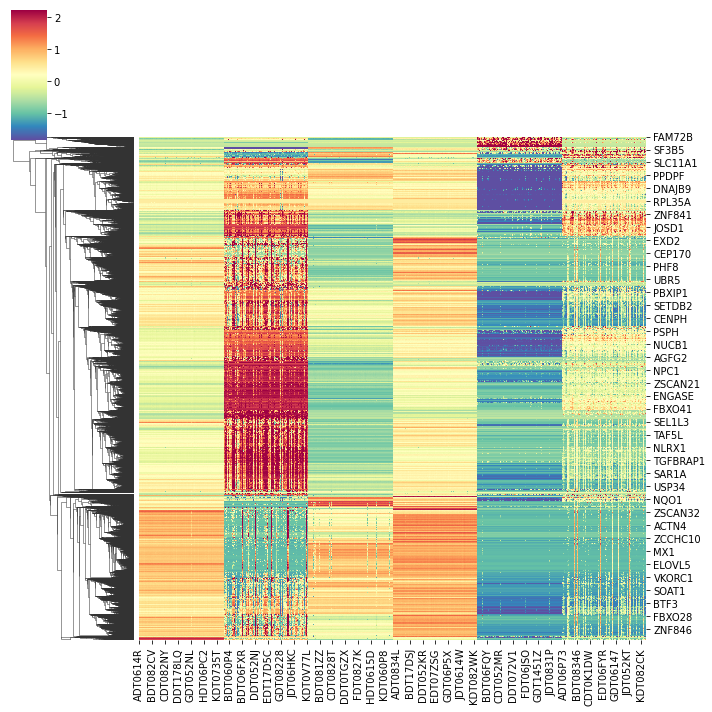

In [14]:
sns.clustermap(data=z_score,cmap='Spectral_r',row_cluster=True,col_cluster=False,robust=True)

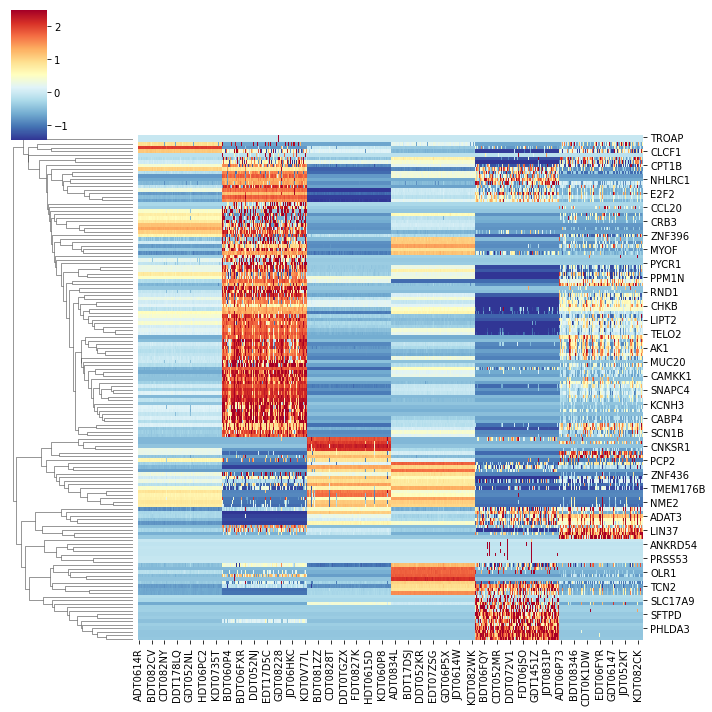

In [35]:
sns.clustermap(data=selected,cmap='RdYlBu_r',row_cluster=True,col_cluster=False,robust=True)